# Part II - (Prosper Loan Data Exploration)
## by (Michael Woo)

## Investigation Overview

This presentation includes the relationship between Prosper ratings and borrower rates, presented by a violin plot, the relationship between credit card utilization and credit score, presented by a heat plot, the relationship between Prosper ratings and the income ranges, presented by a clustered bar plot.


## Dataset Overview

The original data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
After wrangling there are 84,853 loans in the dataset with 69 features. Most variables are numeric, a few are ordered factor variables, and a few are not ordered. For example, the ProsperRating (Alpha) levels are ordered as, from the best to the worst, AA, A, B, C, D, E, HR.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
loan = pd.read_csv('prosperLoanData.csv')

In [ ]:
base_color = sb.color_palette()[0]

In [9]:
loan.dropna(subset=['ProsperRating (Alpha)', 'BorrowerAPR'], inplace=True)

In [10]:
loan.drop(columns=['CreditGrade',
                   'ClosedDate',
                   'GroupKey',
                   'LoanFirstDefaultedCycleNumber',
                   'TotalProsperLoans',
                   'TotalProsperPaymentsBilled',
                   'OnTimeProsperPayments',
                   'ProsperPaymentsLessThanOneMonthLate',
                   'ProsperPaymentsOneMonthPlusLate',
                   'ProsperPrincipalBorrowed',
                   'ProsperPrincipalOutstanding',
                   'ScorexChangeAtTimeOfListing',
                   'LoanFirstDefaultedCycleNumber'], inplace=True)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Relationship between Prosper ratings and borrower rates)

The Prosper rating is an ordinal variable with seven values which are, from the best to the worst, AA, A, B, C, D, E, HR. The borrower rate is a continuous quantitative variable. So a violin plot was used, and it was found that a higher Prosper rating comes with a lower borrower rate.

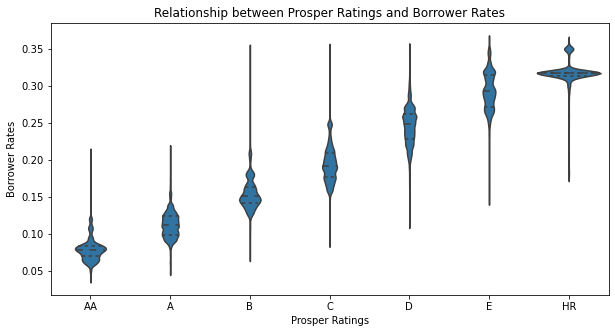

In [11]:
pratings = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
pratings_order = pd.CategoricalDtype(ordered=True, categories=pratings)
loan['ProsperRating (Alpha)'] = loan['ProsperRating (Alpha)'].astype(pratings_order)

plt.figure(figsize=[10, 5])
sb.violinplot(data=loan, x='ProsperRating (Alpha)', y='BorrowerRate', color=base_color, inner='quartiles')
plt.title('Relationship between Prosper Ratings and Borrower Rates')
plt.xlabel('Prosper Ratings')
plt.ylabel('Borrower Rates');

## (Relationship between credit card utilization and credit score)

Here the credit score range upper values were used. Both variables are quantitative, so a heat plot was used. It was found that most of the borrowers have a credit score between 650 and 700 and have utilized their credit card(s) for approximately 1%. 

Also it appears that a credit card holder is more likely to get a higher credit score when utilizing the credit card at a lower percentage. As far as the plot shows, this is true only when the credit card utilization is below 1%; one of the reasons could be that there is not enough data available for the range above 1%. 

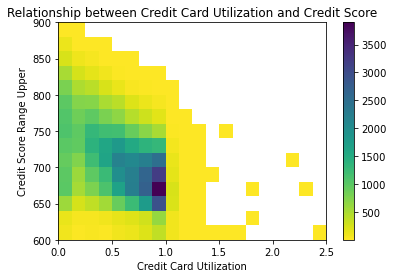

In [12]:
bins_x = np.arange(0, 2.5+0.125, 0.125)
bins_y = np.arange(600, 900+20, 20)
plt.hist2d(data = loan, x = 'BankcardUtilization', y = 'CreditScoreRangeUpper', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.title('Relationship between Credit Card Utilization and Credit Score')
plt.xlabel('Credit Card Utilization')
plt.ylabel('Credit Score Range Upper');

## (Relationship between Prosper ratings and income ranges)

The income range is also an ordinal variable with also seven values which are, from the highest to the lowest, 100,000+ dollars, 75,000-99,999 dollars, 50,000-74,999 dollars, 25,000-49,999 dollars, 1-24,999 dollars, 0, and not employed. So a clustered bar plot was used, and it was found that high income tends to lead to high Prosper rating if looking at the highest bar in each cluster.

It will be noticed that the bar for the 0 dollar level is too low to be visible, which might lead to misunderstandings, so a distribution of income ranges is also ploted with annotations in order to clarify on that.

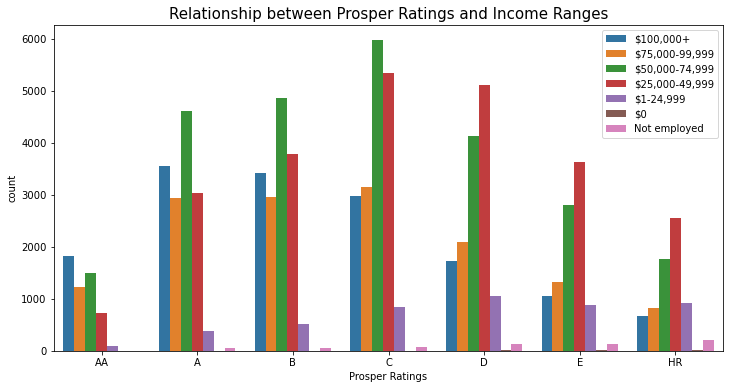

In [17]:
income_ranges = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0', 'Not employed']
income_ranges_order = pd.CategoricalDtype(ordered=True, categories=income_ranges)
loan['IncomeRange'] = loan['IncomeRange'].astype(income_ranges_order)

plt.figure(figsize = [12, 6])
sb.countplot(data = loan, x = 'ProsperRating (Alpha)', hue = 'IncomeRange')
plt.legend(fontsize=10)
plt.title('Relationship between Prosper Ratings and Income Ranges', fontsize=15)
plt.xlabel('Prosper Ratings');

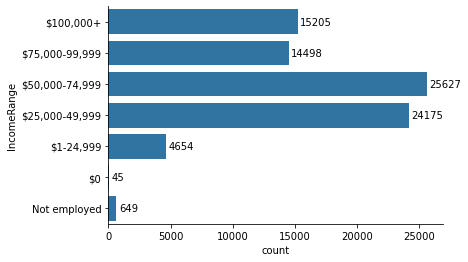

In [18]:
income_counts = loan['IncomeRange'].value_counts(sort=False)
sb.countplot(data=loan, y='IncomeRange', color=base_color);
sb.despine(top=True, right=True)
for i in reversed(range(income_counts.shape[0])):
    count = income_counts[i]
    plt.text(count+200, i, count, va='center')

In [ ]:
jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt